In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [65]:
# Importer les données
so_qte = pd.read_csv('data/SO_QAVG.csv')
po_qte = pd.read_csv('data/PO_QAVG.csv')
exp_qte = pd.read_csv('data/EXP_QAVG.csv')

In [66]:
so_qte.sort_values(by='ProdId').head()

,ProdId,QuantityAVG
1336,100,1.026315
1906,102,1.000000
1786,106,1.000000
761,113,1.108247
1650,115,1.000000


In [67]:
po_qte.sort_values(by='ProdId').head()

,ProdId,QuantityAVG
1460,100,1.538461
2024,102,1.000000
1658,106,1.250000
1239,113,1.956521
1890,115,1.000000


In [68]:
exp_qte.sort_values(by='QuantityAVG', ascending = False).head()

,ProdId,QuantityAVG
326,5469,300.0
304,5219,52.0
285,4968,27.0
259,4592,19.0
221,3700,19.0


In [69]:
so_qte.shape, po_qte.shape

((1993, 2), (2030, 2))

In [70]:
so_qte.rename(columns={'QuantityAVG': 'SaledQte'}, inplace=True)
po_qte.rename(columns={'QuantityAVG': 'PurchasedQte'}, inplace=True)

In [71]:
# Merge des deux DataFrames
all_qte = pd.merge(so_qte, po_qte, on='ProdId', how='outer')
all_qte.sort_values(by='ProdId').head()

,ProdId,SaledQte,PurchasedQte
0,100,1.026315,1.538461
1,102,1.000000,1.000000
2,106,1.000000,1.250000
3,113,1.108247,1.956521
4,115,1.000000,1.000000


In [72]:
all_qte.shape

(2034, 3)

In [73]:
all_qte.isna().sum()

ProdId           0
SaledQte        41
PurchasedQte     4
dtype: int64

In [74]:
# Remplacer les valeurs manquantes par la moyenne
all_qte['SaledQte'] = all_qte['SaledQte'].fillna(all_qte['SaledQte'].mean())
all_qte['PurchasedQte'] = all_qte['PurchasedQte'].fillna(all_qte['PurchasedQte'].mean())

In [75]:
all_qte.isna().sum()

ProdId          0
SaledQte        0
PurchasedQte    0
dtype: int64

In [76]:
all_qte.head()

,ProdId,SaledQte,PurchasedQte
0,100,1.026315,1.538461
1,102,1.000000,1.000000
2,106,1.000000,1.250000
3,113,1.108247,1.956521
4,115,1.000000,1.000000


In [77]:
all_qte.tail()

,ProdId,SaledQte,PurchasedQte
2029,7734,1.329778,2.0
2030,7735,1.329778,1.0
2031,7740,1.329778,1.0
2032,7746,1.000000,3.0
2033,7753,1.329778,1.0


In [78]:
po_qte.PurchasedQte[po_qte.ProdId == 113]

1239    1.956521
Name: PurchasedQte, dtype: float64

In [79]:
so_qte[so_qte.ProdId == 7746], po_qte[po_qte.ProdId == 7746], all_qte[all_qte.ProdId == 7746]

(      ProdId  SaledQte
 1792    7746       1.0,
      ProdId  PurchasedQte
 801    7746           3.0,
       ProdId  SaledQte  PurchasedQte
 2032    7746       1.0           3.0)

In [80]:
all_qte['diff'] = all_qte['PurchasedQte'] - all_qte['SaledQte']

In [81]:
all_qte.head()

,ProdId,SaledQte,PurchasedQte,diff
0,100,1.026315,1.538461,0.512146
1,102,1.000000,1.000000,0.000000
2,106,1.000000,1.250000,0.250000
3,113,1.108247,1.956521,0.848274
4,115,1.000000,1.000000,0.000000


In [82]:
all_qte.sort_values(by='diff', ascending=False).head(50)

,ProdId,SaledQte,PurchasedQte,diff
1132,4178,2.395271,187.553191,185.157920
409,1457,7.301923,159.027777,151.725854
725,2585,5.521276,150.000000,144.478724
838,3000,6.040268,137.142857,131.102589
1134,4187,4.722408,122.916666,118.194258
1834,6959,8.844444,125.000000,116.155556
1630,6087,3.096774,100.000000,96.903226
476,1642,5.955078,101.741935,95.786857
1147,4225,4.219888,97.029702,92.809814
908,3248,2.940487,94.705882,91.765395


In [83]:
all_qte.sort_values(by='diff').head(50)

,ProdId,SaledQte,PurchasedQte,diff
1698,6356,3.000000,2.333333,-0.666667
337,1244,1.500000,1.000000,-0.500000
1449,5315,2.000000,1.500000,-0.500000
1986,7602,1.329778,1.000000,-0.329778
1084,3926,1.329778,1.000000,-0.329778
703,2537,1.329778,1.000000,-0.329778
1085,3928,1.329778,1.000000,-0.329778
2033,7753,1.329778,1.000000,-0.329778
708,2559,1.329778,1.000000,-0.329778
706,2549,1.329778,1.000000,-0.329778


In [84]:
# créer un ficher csv depuis le DataFrame all_qte
all_qte.to_csv('data/selected_items.csv', index=False)

In [85]:
all_qte['diff'].describe()

count    2034.000000
mean        4.309831
std        11.515242
min        -0.666667
25%         0.357142
50%         1.274106
75%         3.365444
max       185.157920
Name: diff, dtype: float64

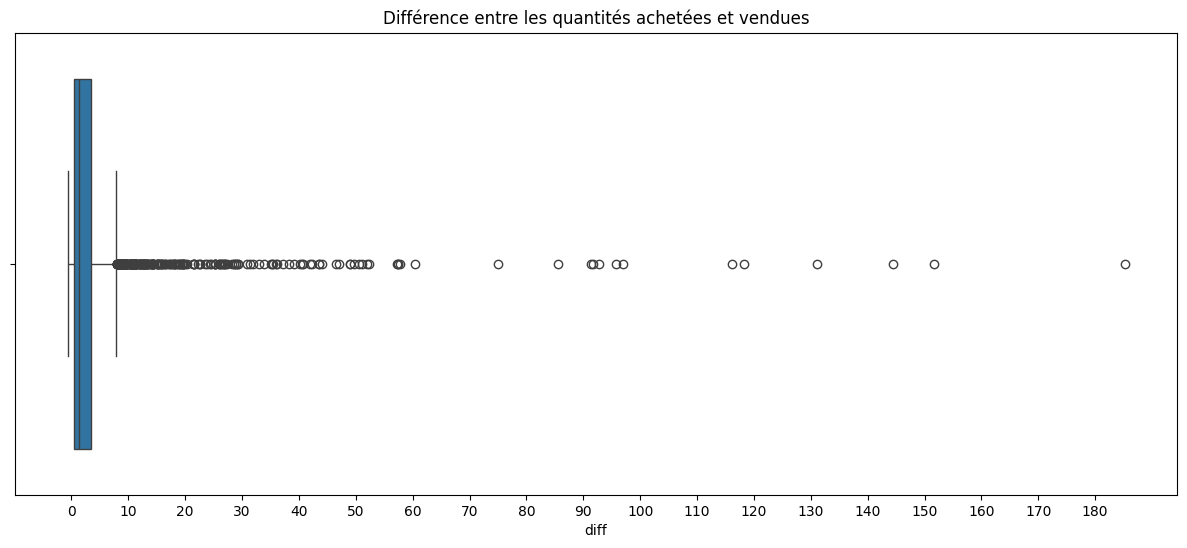

In [86]:
fig = plt.figure(figsize=(15, 6))
sns.boxplot(x='diff', data=all_qte)
plt.title('Différence entre les quantités achetées et vendues')
ticks = np.arange(0, 190, step=10)  # Ajuste 'step' selon tes besoins
plt.xticks(ticks=ticks)
plt.show()

In [87]:
all_qte[all_qte['diff'] > 60].shape[0]

14

**Analyse des données sur les péremptions**

In [88]:
exp_qte.sort_values(by='QuantityAVG', ascending = False).head()

,ProdId,QuantityAVG
326,5469,300.0
304,5219,52.0
285,4968,27.0
259,4592,19.0
221,3700,19.0


In [89]:
exp_qte['QuantityAVG'].describe()

count    446.000000
mean       2.825673
std       14.541654
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max      300.000000
Name: QuantityAVG, dtype: float64

<Axes: xlabel='QuantityAVG'>

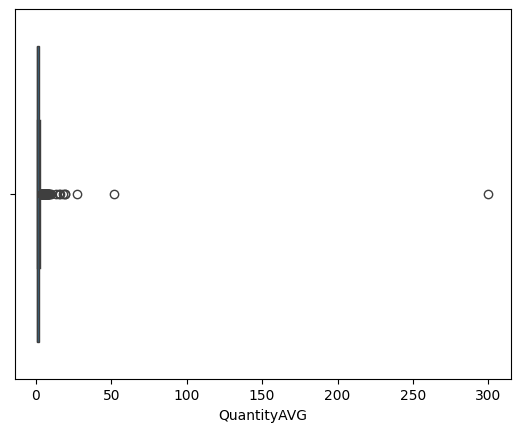

In [90]:
sns.boxplot(x='QuantityAVG', data=exp_qte)